In [38]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import dataframe_image as dfi
%matplotlib inline
plt.rcParams['figure.dpi'] = 70 #display 70 dpi in Jupyter Notebook, may consider100 dpi 
plt.rcParams['savefig.dpi'] = 70 #define 300 dpi for saving figures
sns.set_style('whitegrid')
sns.set(rc={"figure.dpi":70, 'savefig.dpi':70}) #defining dpi setting
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [2]:
dfes = pd.read_csv('RiverRoad_Quan_RF.csv')

In [3]:
#Identifier is MIN, MAX, MEAN, RANGE etc.
def create_heatmap(identifier, ax, title):
    cols = []
    for (columnName, columnData) in dfes.iteritems():
        if identifier in columnName:
            cols.append(columnName)
    dfes_temp = pd.DataFrame(dfes, columns=cols)
    corr = dfes_temp.corr()
    ax.set_title(title)
    sns.heatmap(corr, cmap="Blues", ax=ax, square=True)

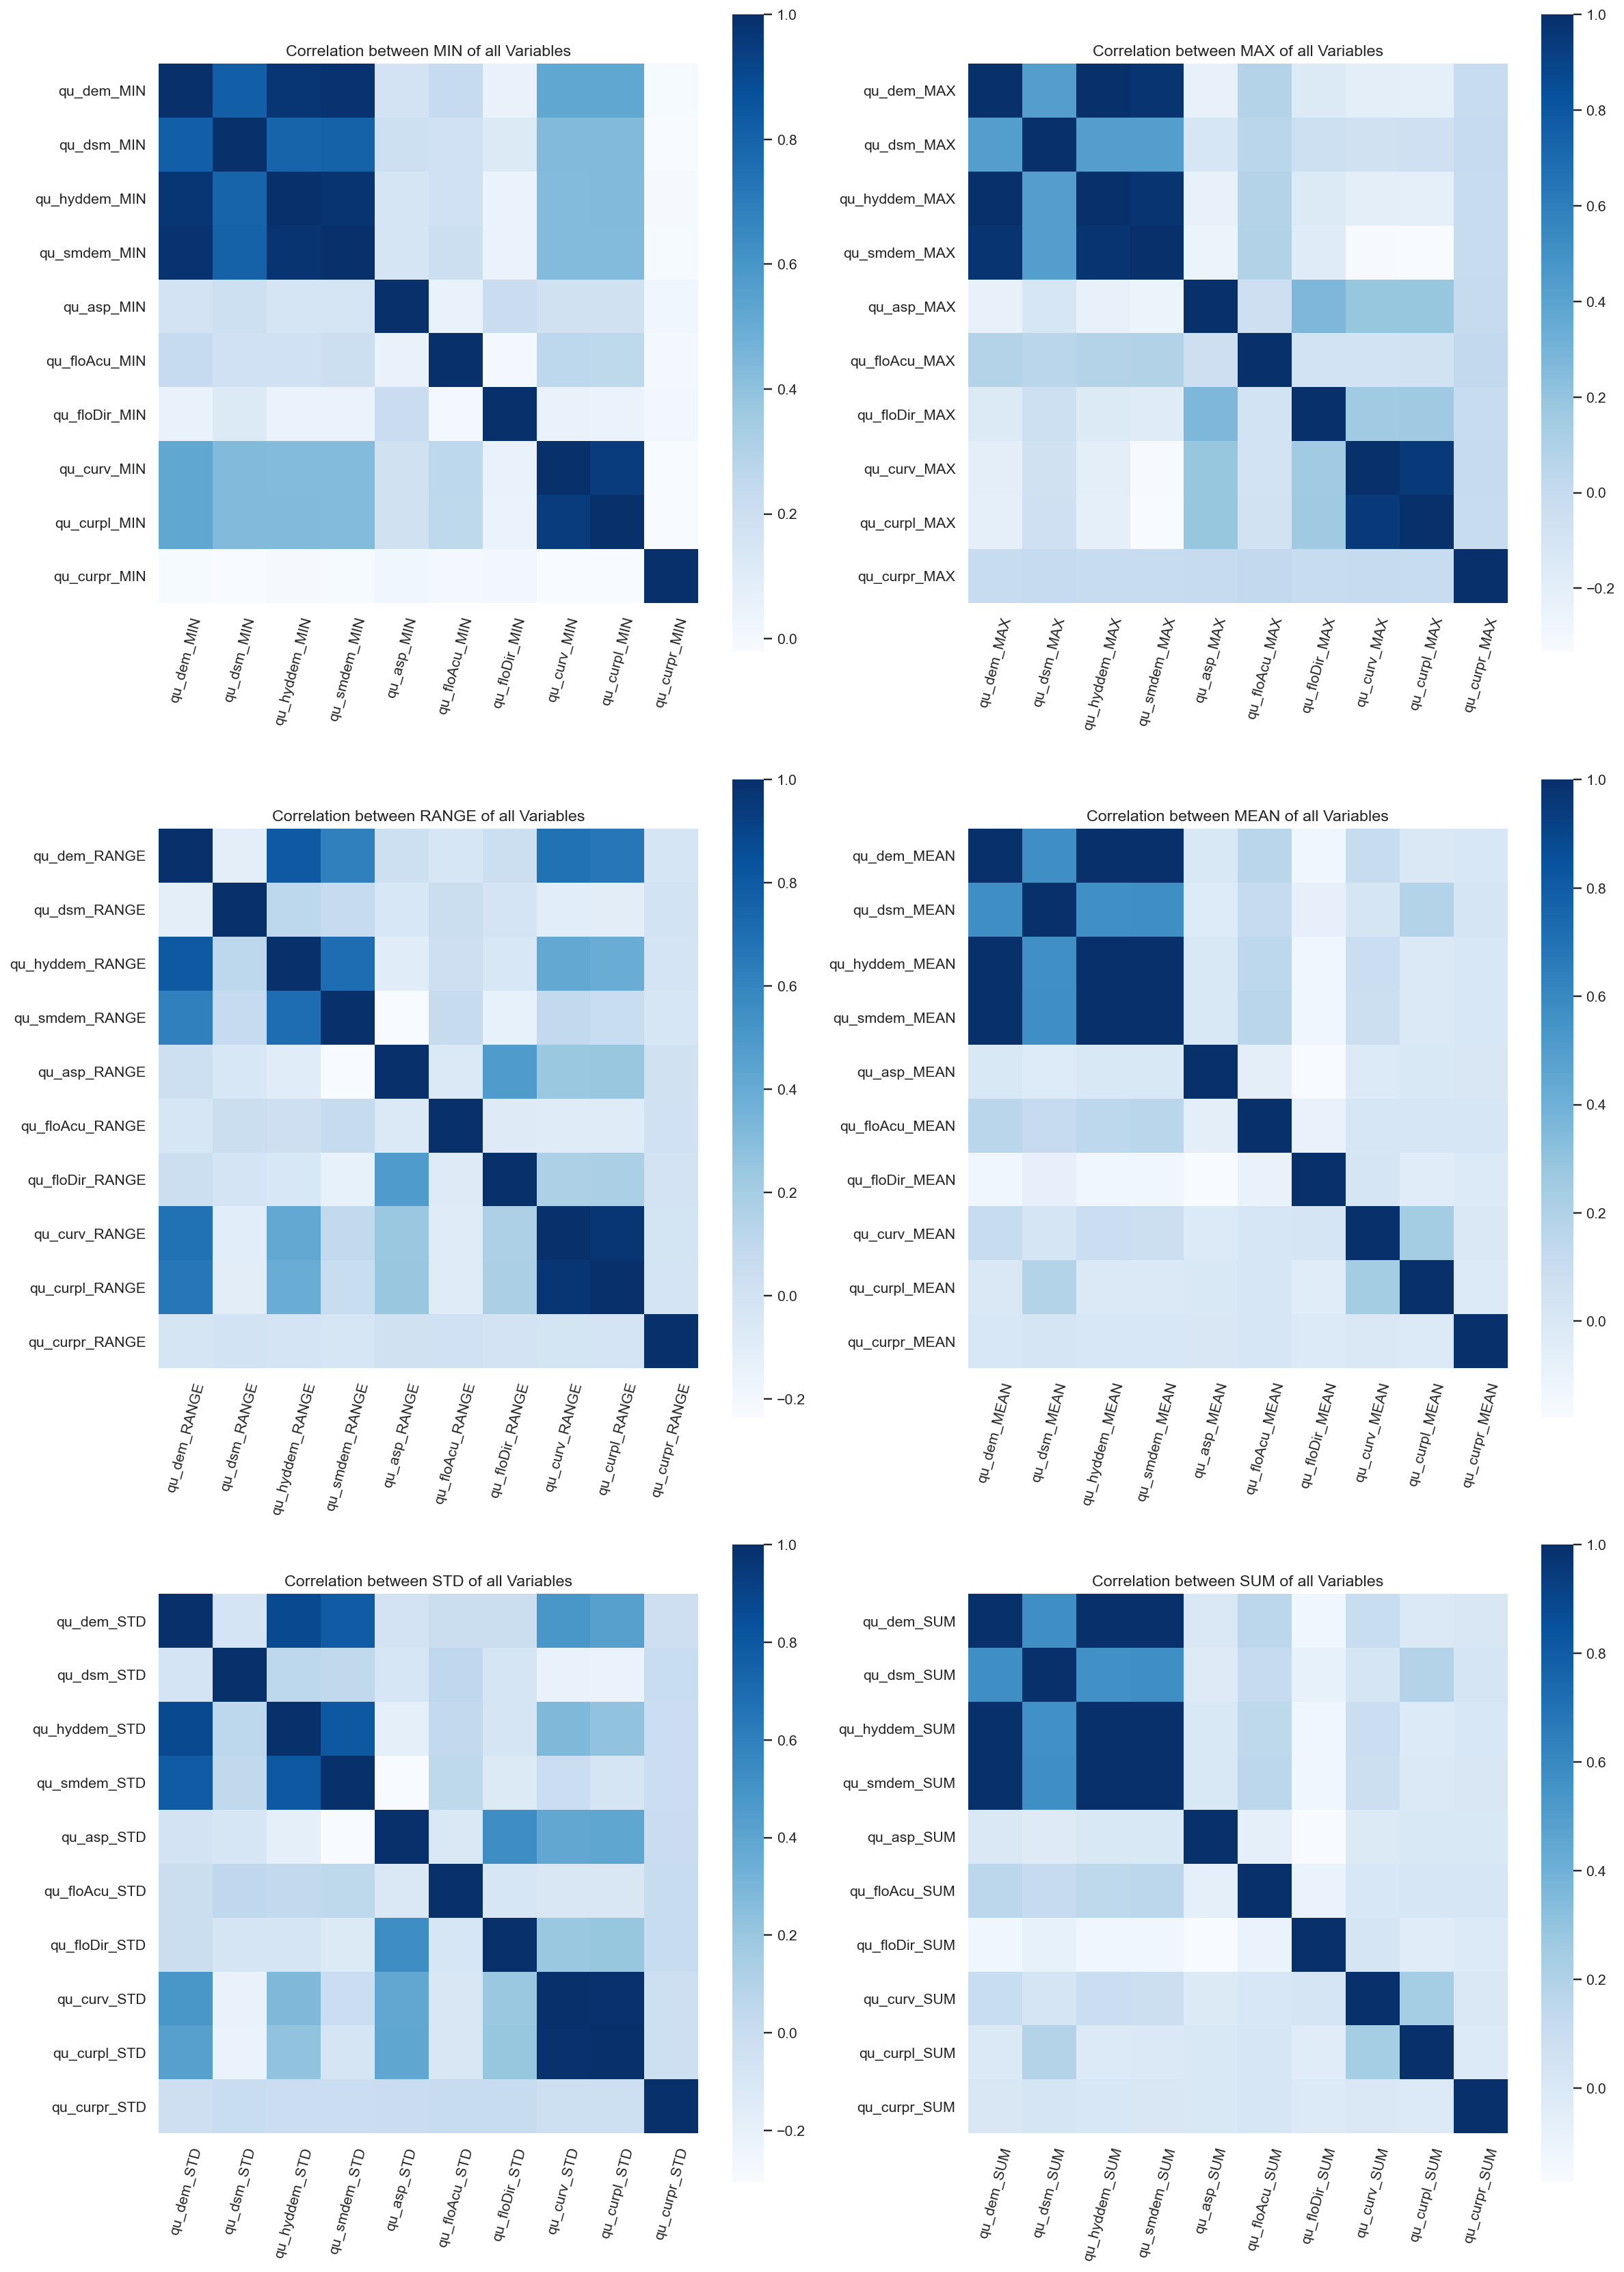

In [32]:
identifier_list = ["MIN", "MAX", "RANGE", "MEAN", "STD", "SUM"]
fig,axn = plt.subplots(3, 2, figsize=(20,30))
i = 0
for ax in axn.flat:
    create_heatmap(identifier_list[i], ax, f"Correlation between {identifier_list[i]} of all Variables")
    ax.tick_params(axis='x', labelrotation=75)
    i+=1

**Look at correlations between wetland/wetland types and variables**


In [34]:
dfes_wetland = dfes[dfes['wetland']=='wetland']
dfes_nonwetland = dfes[dfes['wetland']=='nonwetland']

In [35]:
def populate_wetland_type_list(wetland_type, wetland_list):
    for index, row in dfes.iterrows():
        if row.wetland_type == wetland_type:
            wetland_list.append(1)
        else:
            wetland_list.append(0)

pem1rd_list = []
populate_wetland_type_list("PEM1Rd", pem1rd_list)
df_pem1rd = pd.DataFrame(pem1rd_list, columns=["PEM1Rd"])

r1ubv_list = []
populate_wetland_type_list("R1UBV", r1ubv_list)
df_r1ubv = pd.DataFrame(r1ubv_list, columns=["R1UBV"])

pfO13cd_list = []
populate_wetland_type_list("PFO1/3Cd", pfO13cd_list)
df_pfO13cd = pd.DataFrame(pfO13cd_list, columns=["PFO1/3Cd"])

r5ubh_list = []
populate_wetland_type_list("R5UBH", r5ubh_list)
df_r5ubh = pd.DataFrame(r5ubh_list, columns=["R5UBH"])

pfO1cd_list = []
populate_wetland_type_list("PFO1Cd", pfO1cd_list)
df_pfO1cd = pd.DataFrame(pfO1cd_list, columns=["PFO1Cd"])

dfes_type = pd.concat([df_pem1rd, df_r1ubv, df_pfO13cd, df_r5ubh, df_pfO1cd], axis=1)

In [40]:
df_wetland_corr = pd.concat([dfes[dfes.columns[1:61]], dfes['FID_RiverRd_AOI']], axis=1)
corr = df_wetland_corr.corr()
df_wetland_corr = pd.DataFrame(corr['FID_RiverRd_AOI'])
df_wetland_corr = df_wetland_corr.sort_values(by=['FID_RiverRd_AOI'])
#Remove ['FID_RiverRd_AOI'] row because corr is automatically 1
df_wetland_corr = df_wetland_corr[:-1].abs()
df_wetland_corr = df_wetland_corr.sort_values(by=['FID_RiverRd_AOI'])
wetland_corr = df_wetland_corr.iloc[::-1]

In [21]:
df_pem1rd_corr =pd.concat([dfes[dfes.columns[1:61]], df_pem1rd], axis=1)
corr = df_pem1rd_corr.corr()
corr = corr.iloc[0:60, 60:61]
corr_pem1rd = corr.abs().sort_values(by=["PEM1Rd"])[::-1]

In [22]:
df_r1ubv_corr =pd.concat([dfes[dfes.columns[1:61]], df_r1ubv], axis=1)
corr = df_r1ubv_corr.corr()
corr = corr.iloc[0:60, 60:61]
corr_r1ubv = corr.abs().sort_values(by=["R1UBV"])[::-1]

In [23]:
df_pfO13cd_corr =pd.concat([dfes[dfes.columns[1:61]], df_pfO13cd], axis=1)
corr = df_pfO13cd_corr.corr()
corr = corr.iloc[0:60, 60:61]
corr_pfO13cd = corr.abs().sort_values(by=["PFO1/3Cd"])[::-1]

In [24]:
df_r5ubh_corr =pd.concat([dfes[dfes.columns[1:61]], df_r5ubh], axis=1)
corr = df_r5ubh_corr.corr()
corr = corr.iloc[0:60, 60:61]
corr_r5ubh = corr.abs().sort_values(by=["R5UBH"])[::-1]

In [25]:
df_pfO1cd_corr =pd.concat([dfes[dfes.columns[1:61]], df_pfO1cd], axis=1)
corr = df_pfO1cd_corr.corr()
corr = corr.iloc[0:60, 60:61]
corr_pfO1cd = corr.abs().sort_values(by=["PFO1Cd"])[::-1]

In [46]:
n = 5
df_wc = wetland_corr.head(10)
dfi.export(df_wc,"wetlandcorrdf.png")
# corr_pem1rd.head(n)
# corr_r1ubv.head(n)
# corr_pfO13cd.head(n)
# corr_r5ubh.head(n)
# corr_pfO1cd.head(n)